In [1]:
import numpy as np
import pandas as pd
import sys
import warnings
from functions import *
warnings.filterwarnings("ignore")

# I will work with only numpy in main.py for both simplicity's sake, and because of pandas
# handling memory strangely

# for reproducibility
np.random.seed(123)

# print full arrays/dataframes for debugging
# np.set_printoptions(threshold=sys.maxsize)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# names of columns extracted.
# note we are not using filenames right now, will need to look at that
# for unique identifier because of inode reuse
feat_cols = ["inode", "pid", "ppid", "uid", "euid", "gid", "egid"]

# import all .dat files from ./ima/ into numpy array
data = None
datanp, filepaths = import_ima(data)

./ima/20200115.dat
importing next...
All IMA measurements in ./ima/ imported successfully.


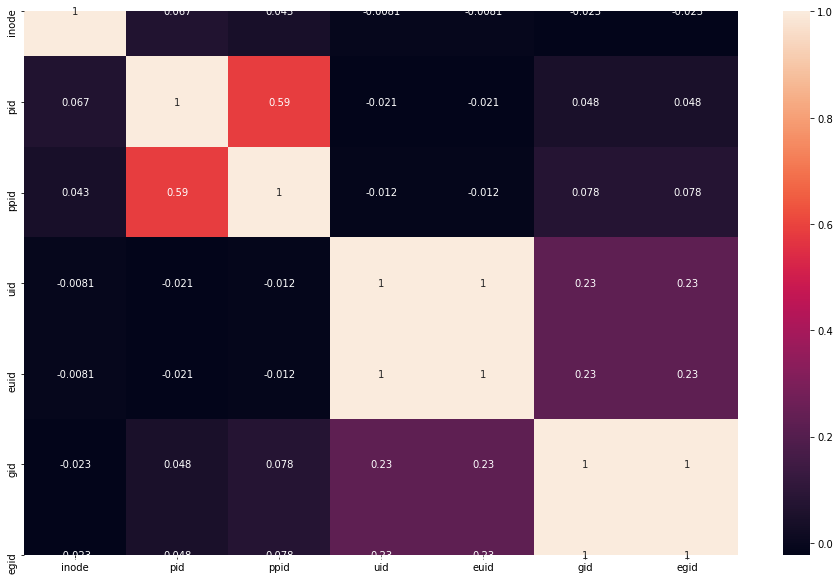

datanp.shape (13471, 5)


In [2]:
# reduce dimensions with high correlation filter
# drawmap=1 to see heatmap for justification
datanp, red_cols = high_corr_filter(datanp=datanp, feat_cols=feat_cols,
                                    drawmap=1)
print("datanp.shape", datanp.shape)

UMAP done! Time elapsed: 17.26811385154724 seconds
umap done in 2 dimensions
showing  umap  plot...


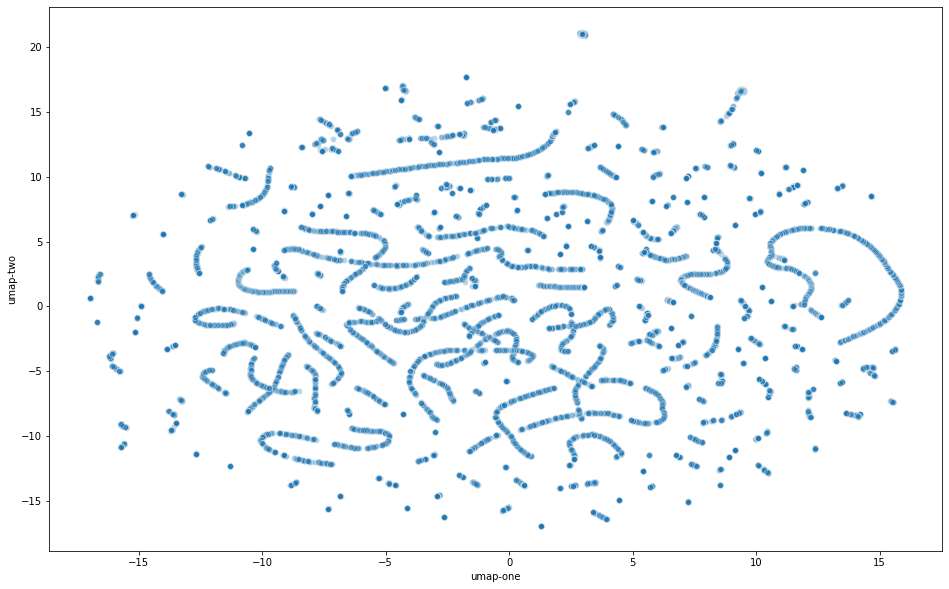

In [3]:
# reduce dimensions using UMAP (to 2 dimensions), return numpy
dataumap = func_umap(datanp=datanp, feat_cols=red_cols,
                     drawplot=1, n_components=2)

Estimated number of clusters: 237
Estimated number of noise points: 21


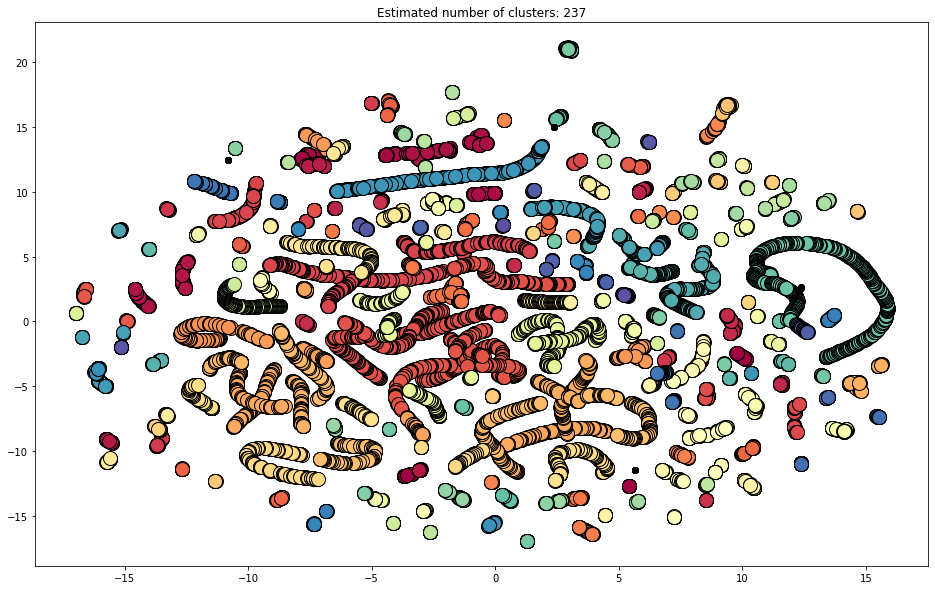

In [4]:
# perform 2D DBSCAN (UMAP). Output 3rd column is cluster labels
dataclust_umap = func_dbscan(data=dataumap[:, [5, 6]],
                        eps=0.4,
                        min_samples=7,
                        drawplot=1)

In [5]:
explore_cluster(datanp=datanp,
                dataclust=dataclust_umap,
                cols=red_cols,
                filepaths=filepaths)

UMAP done! Time elapsed: 12.280110597610474 seconds
umap done in 3 dimensions


<Figure size 1152x720 with 0 Axes>

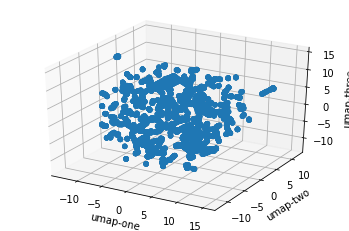

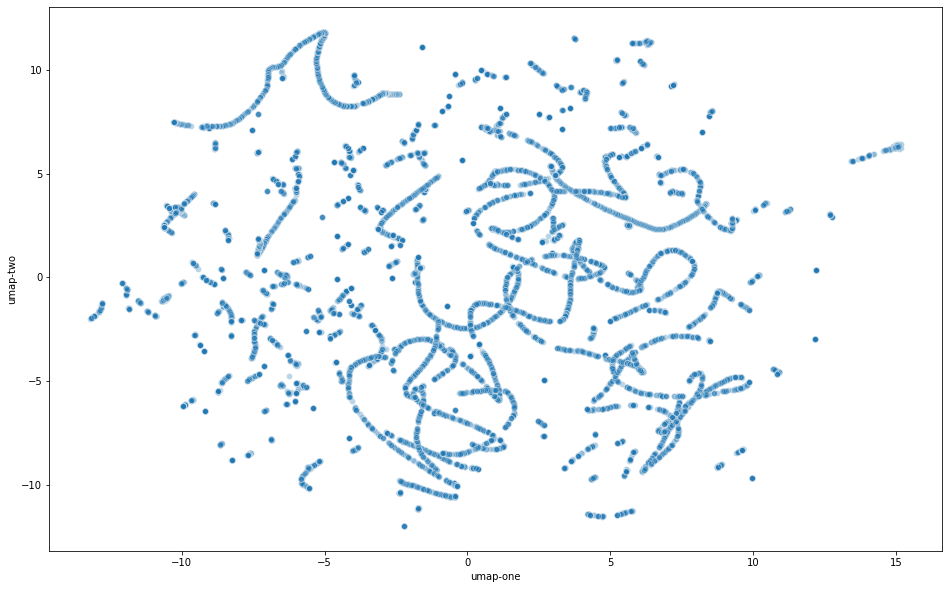

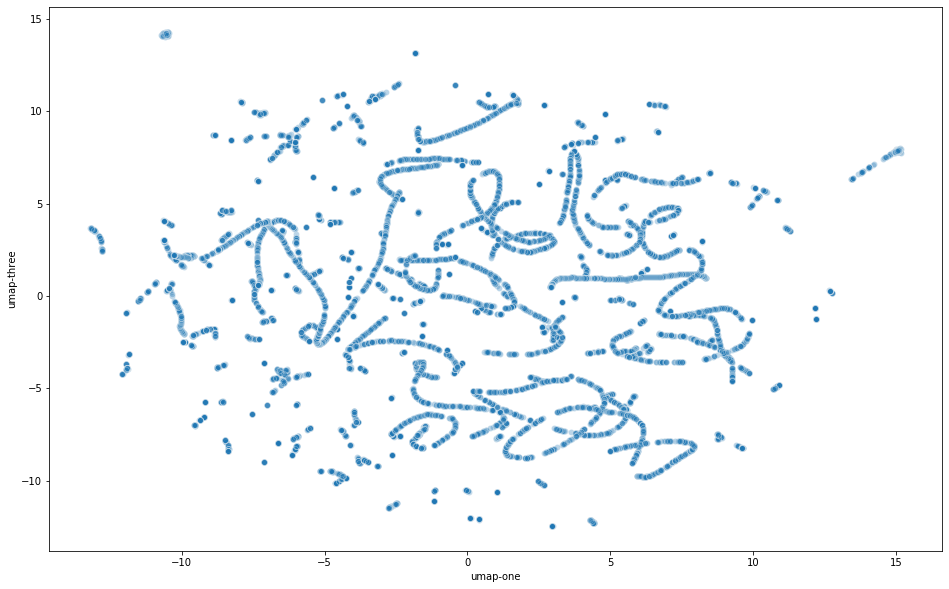

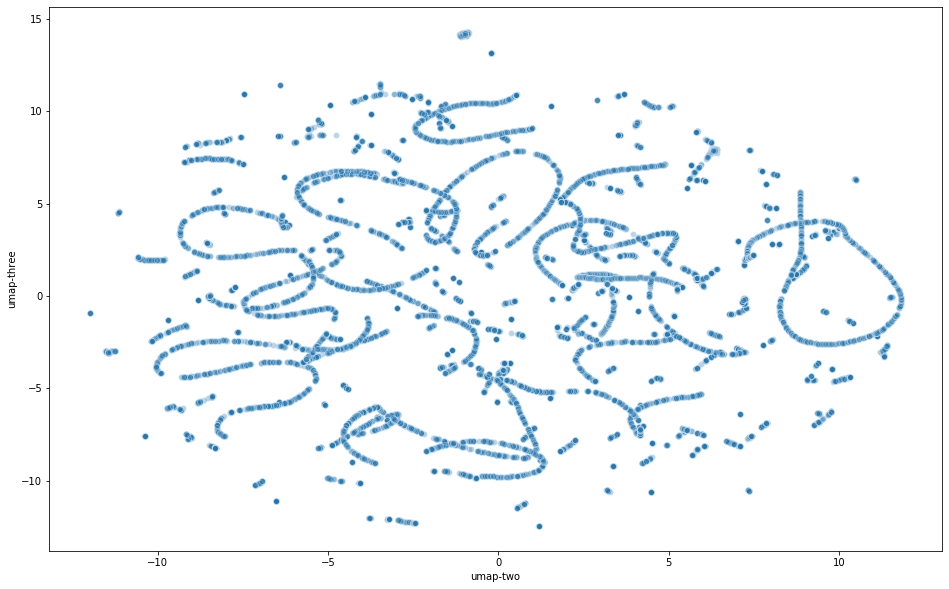

showing  umap  plot...


In [6]:
# reduce dimensions using UMAP (to 3 dimensions), return numpy
dataumap_threedee = func_umap(datanp=datanp, feat_cols=red_cols,
                     drawplot=1, n_components=3)

Estimated number of clusters: 238
Estimated number of noise points: 22


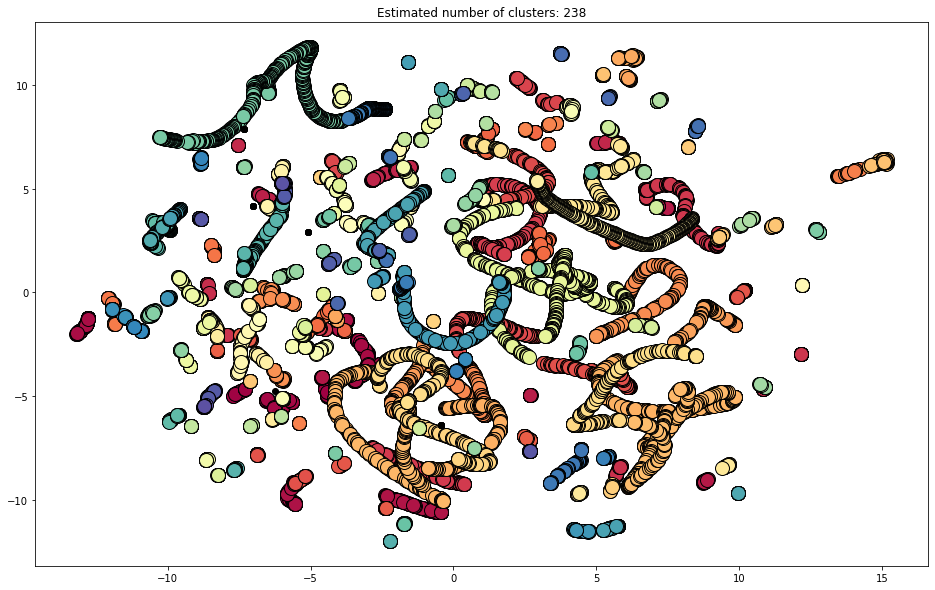

ValueError: Shape of passed values is (13471, 3), indices imply (13471, 2)

In [7]:
# perform 3D DBSCAN (UMAP). Output 3rd column is cluster labels
dataclust_umap_threedee = func_dbscan(data=dataumap_threedee[:, [5, 6, 7]],
                        eps=0.4,
                        min_samples=7,
                        drawplot=1)

In [ ]:
explore_cluster(datanp=datanp,
                dataclust=dataclust_umap_threedee,
                cols=red_cols,
                filepaths=filepaths)